# Communicable Diseases

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [192]:
malaria = pd.read_csv("masa/incedenceOfMalaria.csv")
tuberculosis = pd.read_csv("masa/incedenceOfTuberculosis.csv")
HBsAg = pd.read_csv("masa/hepatitusBsurfaceAntigen.csv")
NTDs = pd.read_csv("masa/interventionAgianstNTDs.csv")
HIV = pd.read_csv("masa/newHivInfections.csv")

In [193]:
malaria.head()

,Location,Indicator,Period,First Tooltip
0,Afghanistan,Malaria incidence (per 1 000 population at risk),2018,29.01
1,Afghanistan,Malaria incidence (per 1 000 population at risk),2017,27.07
2,Afghanistan,Malaria incidence (per 1 000 population at risk),2016,26.11
3,Afghanistan,Malaria incidence (per 1 000 population at risk),2015,14.91
4,Afghanistan,Malaria incidence (per 1 000 population at risk),2014,12.67


In [194]:
tuberculosis.head()

,Location,Indicator,Period,First Tooltip
0,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2019,189 [122-270]
1,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2018,189 [122-270]
2,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2017,189 [122-270]
3,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2016,189 [122-270]
4,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2015,189 [122-270]


In [195]:
HBsAg.head()

,Location,Indicator,Period,First Tooltip
0,Afghanistan,Hepatitis B surface antigen (HBsAg) prevalence...,2015,0.5 [0.29-0.78]
1,Albania,Hepatitis B surface antigen (HBsAg) prevalence...,2015,1.29 [0.83-1.91]
2,Algeria,Hepatitis B surface antigen (HBsAg) prevalence...,2015,0.22 [0.12-0.34]
3,Andorra,Hepatitis B surface antigen (HBsAg) prevalence...,2015,0.08 [0-1.65]
4,Angola,Hepatitis B surface antigen (HBsAg) prevalence...,2015,4.85 [3.29-6.81]


In [196]:
NTDs.head()

,Location,Indicator,Period,First Tooltip
0,Afghanistan,Reported number of people requiring interventi...,2018,14834701
1,Afghanistan,Reported number of people requiring interventi...,2017,14786722
2,Afghanistan,Reported number of people requiring interventi...,2016,13275429
3,Afghanistan,Reported number of people requiring interventi...,2015,13765392
4,Afghanistan,Reported number of people requiring interventi...,2014,13384908


In [197]:
HIV.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,New HIV infections (per 1000 uninfected popula...,Both sexes,0.04 [0.01-0.15]
1,Afghanistan,2019,New HIV infections (per 1000 uninfected popula...,Male,0.06 [0.02-0.21]
2,Afghanistan,2019,New HIV infections (per 1000 uninfected popula...,Female,0.03
3,Afghanistan,2015,New HIV infections (per 1000 uninfected popula...,Both sexes,0.03 [0.01-0.11]
4,Afghanistan,2015,New HIV infections (per 1000 uninfected popula...,Male,0.05 [0.02-0.16]


# Malaria Dataset

# 1. Data Cleaning:

check for missing data:

In [198]:
malaria.isnull().sum()

Location         0
Indicator        0
Period           0
First Tooltip    0
dtype: int64

check for duplicates:

In [199]:
malaria.duplicated().any()

False

data validation check:

In [200]:
malaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       2033 non-null   object 
 1   Indicator      2033 non-null   object 
 2   Period         2033 non-null   int64  
 3   First Tooltip  2033 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 63.7+ KB


In [201]:
malaria.describe()

,Period,First Tooltip
count,2033.000000,2033.000000
mean,2009.000000,109.186490
std,5.478573,157.895669
min,2000.000000,0.000000
25%,2004.000000,0.520000
50%,2009.000000,11.150000
75%,2014.000000,200.000000
max,2018.000000,743.500000


In [202]:
malaria.dtypes

Location          object
Indicator         object
Period             int64
First Tooltip    float64
dtype: object

In [203]:
malaria = df.rename(columns={'Period': 'Year'})

In [204]:
malaria['Period'] = pd.to_datetime(malaria['Year'], format='%Y')

In [205]:
malaria.dtypes

Location                 object
Indicator                object
Year                      int64
First Tooltip           float64
Period           datetime64[ns]
dtype: object

check for outliers:

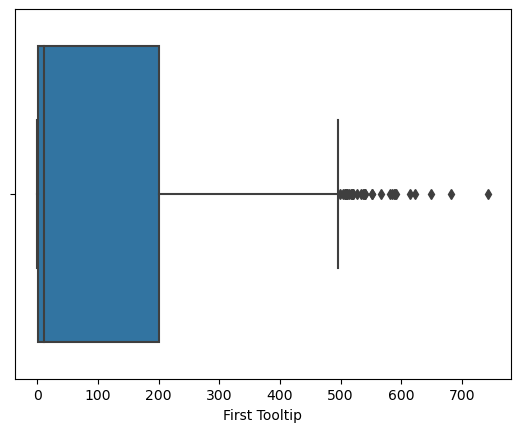

In [206]:
sns.boxplot(x=malaria['First Tooltip'])
plt.show()

# 2. Feature Engineering:

Create Derived Features:

In [207]:
malaria['Period range'] = malaria['Period'].apply(lambda x: 'Before 2014' if x.year < 2014 else '2014 and After')

In [208]:
malaria.head()

,Location,Indicator,Year,First Tooltip,Period,Period range
0,Afghanistan,Malaria incidence (per 1 000 population at risk),2018,29.01,2018-01-01,2014 and After
1,Afghanistan,Malaria incidence (per 1 000 population at risk),2017,27.07,2017-01-01,2014 and After
2,Afghanistan,Malaria incidence (per 1 000 population at risk),2016,26.11,2016-01-01,2014 and After
3,Afghanistan,Malaria incidence (per 1 000 population at risk),2015,14.91,2015-01-01,2014 and After
4,Afghanistan,Malaria incidence (per 1 000 population at risk),2014,12.67,2014-01-01,2014 and After


Encode Categorical Variables:

first, we will convert the categorical columns into numerical columns. we will use label encoding for Indicator column because it has ordinal variables and one-hot encoding for Location column because it has nominal variables. but we will enode the column Location in the upcoming steps.

In [209]:
malaria['Indicator_encoding'] = malaria['Indicator'].astype('category').cat.codes

In [210]:
malaria.head()

,Location,Indicator,Year,First Tooltip,Period,Period range,Indicator_encoding
0,Afghanistan,Malaria incidence (per 1 000 population at risk),2018,29.01,2018-01-01,2014 and After,0
1,Afghanistan,Malaria incidence (per 1 000 population at risk),2017,27.07,2017-01-01,2014 and After,0
2,Afghanistan,Malaria incidence (per 1 000 population at risk),2016,26.11,2016-01-01,2014 and After,0
3,Afghanistan,Malaria incidence (per 1 000 population at risk),2015,14.91,2015-01-01,2014 and After,0
4,Afghanistan,Malaria incidence (per 1 000 population at risk),2014,12.67,2014-01-01,2014 and After,0


# 3. Data Transformation:

Standardization:

In [211]:
scaler = StandardScaler()
malaria['First Tooltip Scaled'] = scaler.fit_transform(malaria[['First Tooltip']])

In [212]:
malaria.head()

,Location,Indicator,Year,First Tooltip,Period,Period range,Indicator_encoding,First Tooltip Scaled
0,Afghanistan,Malaria incidence (per 1 000 population at risk),2018,29.01,2018-01-01,2014 and After,0,-0.507906
1,Afghanistan,Malaria incidence (per 1 000 population at risk),2017,27.07,2017-01-01,2014 and After,0,-0.520196
2,Afghanistan,Malaria incidence (per 1 000 population at risk),2016,26.11,2016-01-01,2014 and After,0,-0.526277
3,Afghanistan,Malaria incidence (per 1 000 population at risk),2015,14.91,2015-01-01,2014 and After,0,-0.597228
4,Afghanistan,Malaria incidence (per 1 000 population at risk),2014,12.67,2014-01-01,2014 and After,0,-0.611418


Transform Skewed Data:

In [213]:
print(malaria['First Tooltip'].skew())

1.2909617002636702


it is skewed because we got a value greater than one, so we will apply the log transformation.

In [214]:
malaria['First Tooltip Log'] = np.log1p(malaria['First Tooltip'])

In [215]:
malaria.head()

,Location,Indicator,Year,First Tooltip,Period,Period range,Indicator_encoding,First Tooltip Scaled,First Tooltip Log
0,Afghanistan,Malaria incidence (per 1 000 population at risk),2018,29.01,2018-01-01,2014 and After,0,-0.507906,3.401531
1,Afghanistan,Malaria incidence (per 1 000 population at risk),2017,27.07,2017-01-01,2014 and After,0,-0.520196,3.334701
2,Afghanistan,Malaria incidence (per 1 000 population at risk),2016,26.11,2016-01-01,2014 and After,0,-0.526277,3.299903
3,Afghanistan,Malaria incidence (per 1 000 population at risk),2015,14.91,2015-01-01,2014 and After,0,-0.597228,2.766948
4,Afghanistan,Malaria incidence (per 1 000 population at risk),2014,12.67,2014-01-01,2014 and After,0,-0.611418,2.615204


# 4. Feature Selection:

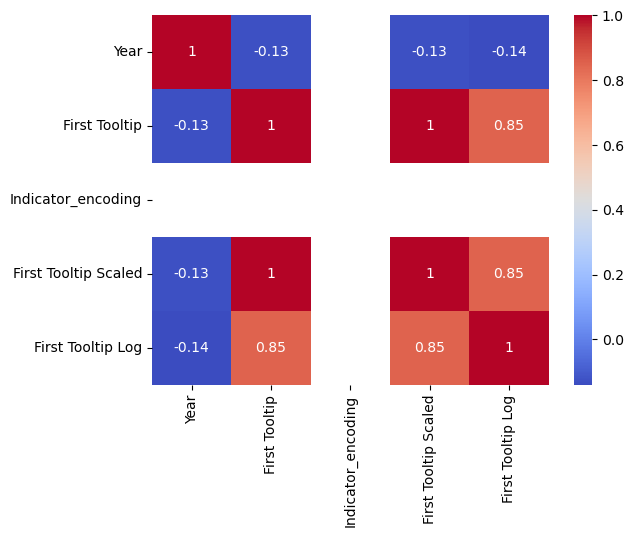

In [216]:
correlation = malaria.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

it appears that tooltip is correlated with year, with a correlation of -0.13, implying that the more years increasing the lower the tooltip is becoming.

# 5. Split Data:

Train-Test Split: